<a href="https://colab.research.google.com/github/henka-d87tg83ic2/ML_Utils_Collection/blob/main/f_PR_nnet2_cb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネットワーク

irisデータセット

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris() #irisデータをロード

from sklearn.model_selection import train_test_split
#データを訓練用と試験用に分割
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=1, shuffle = True)

# StandardScalerを使って、平均0分散1になるようにスケーリング
from sklearn.preprocessing import StandardScaler
# 特徴量（入力データ）
ss = StandardScaler() # 標準化のためのスケーラー
ss.fit(x_train) # 変換のためのパラメータ（平均と標準偏差）を計算
x_train_std = ss.transform(x_train) # データの変換（標準化の実行）
x_test_std = ss.transform(x_test)
print(x_train_std[:5]) # 入力でデータを5件表示
print(x_test_std[:5])

[[ 0.31553662 -0.04578885  0.44767531  0.23380268]
 [ 2.2449325  -0.04578885  1.29769171  1.39742892]
 [-0.2873996  -1.24028061  0.05100098 -0.15407273]
 [ 0.67729835 -0.52358555  1.01435291  1.13884531]
 [-0.04622511 -0.52358555  0.73101411  1.52672073]]
[[-0.04622511  2.34319467 -1.47902854 -1.31769898]
 [-0.89033581 -1.24028061 -0.45900886 -0.15407273]
 [ 0.91847283 -0.04578885  0.33433978  0.23380268]
 [-0.52857408  2.10429632 -1.42236078 -1.05911537]
 [ 2.48610699  1.86539796  1.46769499  1.00955351]]


### モデルの用意

In [ ]:
from sklearn.neural_network import MLPClassifier
# Define Neural Neowork model
clf = MLPClassifier(hidden_layer_sizes=10, activation='relu', solver='sgd', max_iter=10000)

### モデルの学習と分類精度

In [ ]:
# Lerning model
clf.fit(x_train_std, y_train)

# Predict test data
y_pred = clf.predict(x_test_std)

# Calculate prediction accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9666666666666667


### 予測

モデルによって試験用データを分類した結果と正解ラベルとを比較する。

In [ ]:
import numpy as np
print(y_pred)      # 予測結果を表示
print(y_test)      # 正解ラベルを表示

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]


学習過程の表示

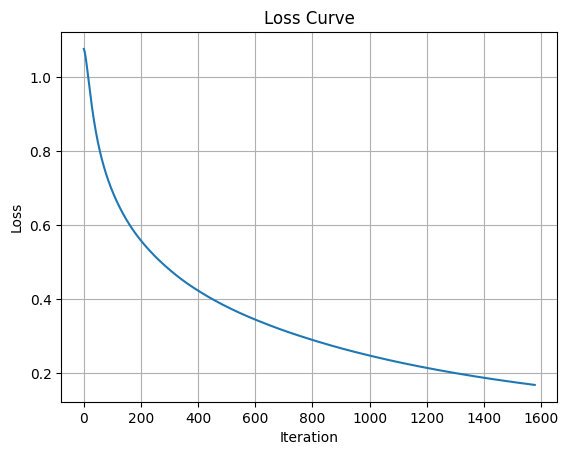

In [ ]:
import matplotlib.pyplot as plt
# Show loss curve
plt.plot(clf.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()